# Import Libraries

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
from matplotlib.ticker import FuncFormatter
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns
import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

In [2]:
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [3]:
q = 'Data/Chicago/Chicago-Crime_*.csv'
chunked_files = glob.glob(q)
# Showing the first 5
chunked_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [4]:
## Loading and Concatenating the list of dfs with 1 line
df_combined = pd.concat([pd.read_csv(file, index_col=0) for file in chunked_files])
df_combined.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996
1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919
1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.0,NaN,41.974911,-87.846348
1311358,01/01/2001 01:00:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,41.811226,-87.687401


In [5]:
df = df_combined.copy()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7855402 entries, 1310586 to 13152172
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 614.3+ MB


,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996
1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919
1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.0,NaN,41.974911,-87.846348
1311358,01/01/2001 01:00:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,41.811226,-87.687401


In [6]:
df.shape

(7855402, 11)

# Convert date to datetime 

In [7]:
%%time
fmt = '%m/%d/%Y %I:%M:%S %p'
df['Date'] = pd.to_datetime(df['Date'], format=fmt)
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7855402 entries, 1310586 to 13152172
Data columns (total 11 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  datetime64[ns]
 1   Primary Type          object        
 2   Description           object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
 6   Beat                  int64         
 7   District              float64       
 8   Ward                  float64       
 9   Latitude              float64       
 10  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 614.3+ MB
CPU times: total: 34.6 s
Wall time: 34.8 s


,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
1310586,2001-01-01 01:00:00,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
1323184,2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996


In [8]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day of Month'] = df['Date'].dt.day
df.head(2)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year,Month,Day of Month
ID,,,,,,,,,,,,,,
1310586,2001-01-01 01:00:00,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856,2001,January,1
1323184,2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996,2001,January,1


## Set Datetime as Index

In [9]:
# set Datetime as Index
df = df.set_index('Date')
df.head(2)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Year,Month,Day of Month
Date,,,,,,,,,,,,,
2001-01-01 01:00:00,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856,2001,January,1
2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996,2001,January,1


In [10]:
df.index

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-01 13:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               ...
               '2023-07-25 12:46:00', '2023-07-25 00:46:00',
               '2023-07-25 12:46:00', '2023-07-25 12:49:00',
               '2023-07-25 00:50:00', '2023-07-25 12:50:00',
               '2023-07-25 00:50:00', '2023-07-25 12:51:00',
               '2023-07-25 12:53:00', '2023-07-25 00:59:00'],
              dtype='datetime64[ns]', name='Date', length=7855402, freq=None)

## Drop Unecessary Columns

In [11]:
# drop unecessary columns
df.drop(columns=['Latitude', 'Longitude'], inplace=True)
df.head(2)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Month,Day of Month
Date,,,,,,,,,,,
2001-01-01 01:00:00,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,2001,January,1
2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,2001,January,1


## Checking for Missing Values

In [12]:
##check nulls before coercing errors
df.isna().sum()

Primary Type                 0
Description                  0
Location Description     10810
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614849
Year                         0
Month                        0
Day of Month                 0
dtype: int64

# Stakeholder Questions to Answer

## Question 1: Comparing Police Districts: Which district has the most crimes? Which has the least?

In [13]:
df['District'].value_counts().sort_values()

21.0         4
31.0       246
20.0    139070
17.0    226698
24.0    237564
22.0    257351
16.0    263114
14.0    303754
1.0     318353
15.0    336085
10.0    338494
5.0     347809
18.0    352735
19.0    353148
2.0     372217
9.0     383557
12.0    389772
3.0     398385
4.0     446049
25.0    446658
7.0     453430
6.0     459446
11.0    503791
8.0     527625
Name: District, dtype: int64

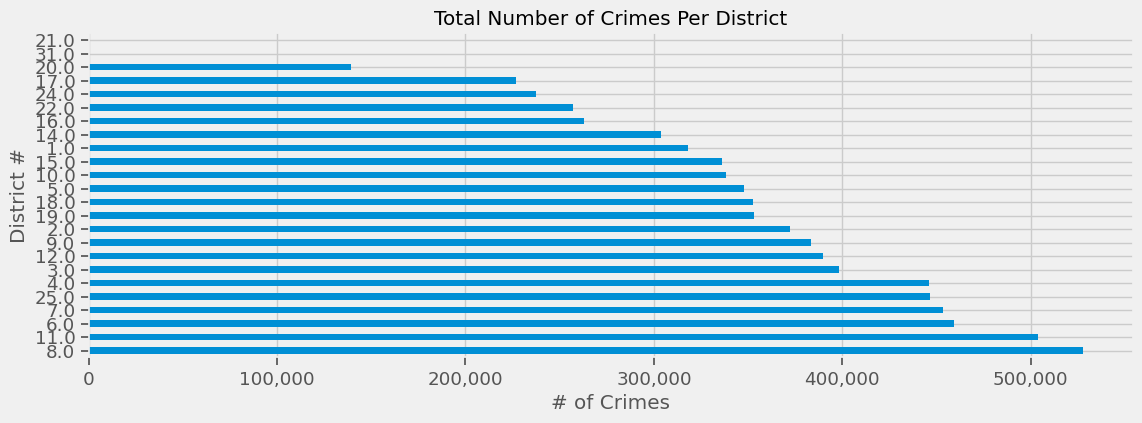

In [14]:
# Sort the dataframe by the value counts of the 'District' column in ascending order
sorted_df = df['District'].value_counts().sort_values(ascending=True)

# Plotting the sorted value counts by the district
ax = sorted_df.plot(kind='barh', xlabel='# of Crimes', ylabel='District #',
                   title='Total Number of Crimes Per District')

# Formatting x-axis labels with commas every 3 numbers
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Reverse the y-axis to have the lowest district at the top
ax.invert_yaxis()


- District 8 has the most crimes at 527625
- District 21 has the least crimes at 4

## Question 2) Crimes Across the Years:
   - Is the total number of crimes increasing or decreasing across the years?
   - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [15]:
df.index

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-01 13:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               ...
               '2023-07-25 12:46:00', '2023-07-25 00:46:00',
               '2023-07-25 12:46:00', '2023-07-25 12:49:00',
               '2023-07-25 00:50:00', '2023-07-25 12:50:00',
               '2023-07-25 00:50:00', '2023-07-25 12:51:00',
               '2023-07-25 12:53:00', '2023-07-25 00:59:00'],
              dtype='datetime64[ns]', name='Date', length=7855402, freq=None)

In [16]:
# Resample the data yearly and count the number of crimes for each year
ts = df.resample("Y").size()

In [17]:
ts.head()

Date
2001-12-31    485885
2002-12-31    486806
2003-12-31    475984
2004-12-31    469421
2005-12-31    453772
Freq: A-DEC, dtype: int64

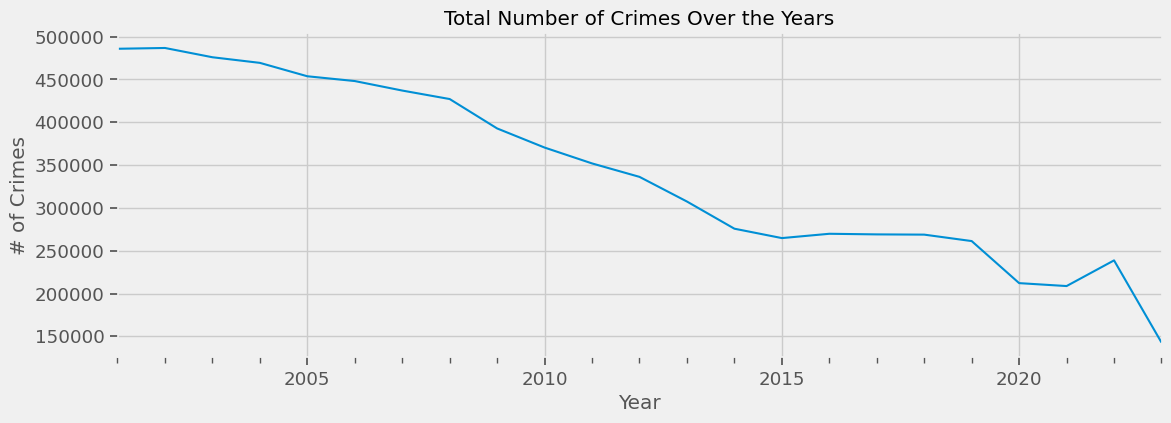

In [18]:
# Plot total crimes across years
ts.plot(kind='line', title='Total Number of Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('# of Crimes')
plt.show()

In [23]:
crimes_by_year = df.groupby('Primary Type').resample("Y").size()
crimes_by_year

Primary Type       Date      
ARSON              2001-12-31    1011
                   2002-12-31    1032
                   2003-12-31     955
                   2004-12-31     778
                   2005-12-31     691
                                 ... 
WEAPONS VIOLATION  2019-12-31    6339
                   2020-12-31    8432
                   2021-12-31    8980
                   2022-12-31    8766
                   2023-12-31    5024
Length: 754, dtype: int64

In [24]:
crimes_by_year_unstack = crimes_by_year.unstack(0)
crimes_by_year_unstack.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-12-31,1011.0,31384.0,93461.0,26014.0,1.0,1779.0,55859.0,29.0,13241.0,14948.0,1.0,934.0,667.0,NaN,406.0,279.0,933.0,1637.0,27553.0,50567.0,NaN,NaN,NaN,19.0,2263.0,6.0,29662.0,6026.0,9.0,2750.0,8.0,18441.0,2239.0,204.0,99277.0,4277.0
2002-12-31,1032.0,31523.0,94153.0,25623.0,0.0,1807.0,55941.0,27.0,13880.0,13732.0,NaN,971.0,658.0,NaN,361.0,337.0,829.0,1414.0,25121.0,51789.0,NaN,NaN,NaN,26.0,2593.0,5.0,32600.0,6408.0,8.0,2457.0,2.0,18523.0,2173.0,200.0,98332.0,4281.0
2003-12-31,955.0,29477.0,88380.0,25157.0,0.0,1571.0,55011.0,41.0,14807.0,13459.0,NaN,1088.0,604.0,NaN,409.0,364.0,705.0,1311.0,22748.0,54288.0,NaN,1.0,NaN,16.0,3047.0,2.0,31147.0,6214.0,6.0,2430.0,2.0,17332.0,2078.0,247.0,98876.0,4211.0
2004-12-31,778.0,28850.0,87136.0,24564.0,0.0,1538.0,53164.0,41.0,15913.0,13255.0,NaN,1122.0,455.0,NaN,531.0,349.0,482.0,985.0,22805.0,57060.0,NaN,0.0,NaN,13.0,3099.0,9.0,29532.0,7476.0,9.0,2495.0,1.0,15978.0,1805.0,215.0,95463.0,4298.0
2005-12-31,691.0,27067.0,83964.0,25503.0,0.0,1521.0,54548.0,37.0,16655.0,13590.0,NaN,1078.0,453.0,NaN,615.0,258.0,389.0,1005.0,22497.0,56234.0,NaN,0.0,NaN,19.0,2906.0,9.0,28028.0,6124.0,4.0,2730.0,2.0,16047.0,1816.0,192.0,85684.0,4106.0


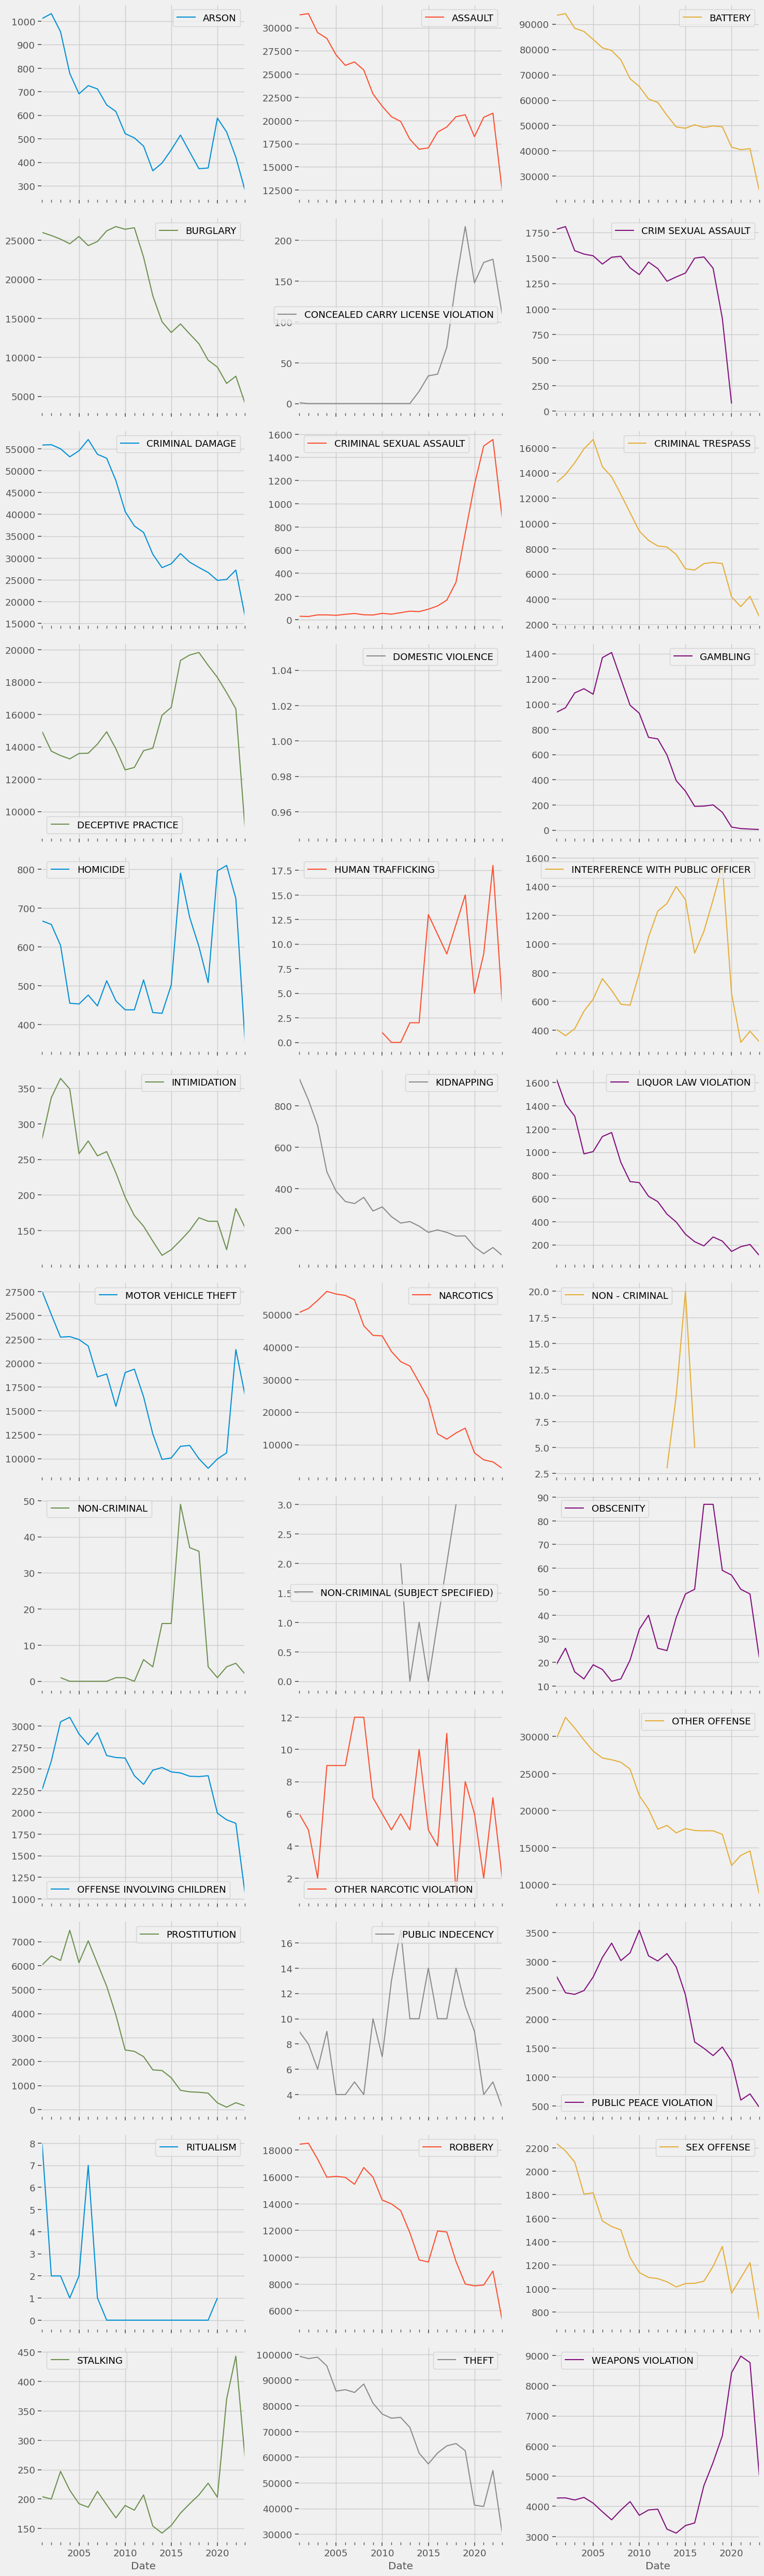

In [25]:
# Plot the data
crimes_by_year_unstack.plot(subplots=True, layout=(-1, 3), figsize=(15, 50))
plt.tight_layout()
plt.show()

- Overall crime is decreasing, but it appears that Non-Criminal (subject specified) is doing the opposite and has a large upwards spike.

## Question 3) Comparing Months:

- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [26]:
df['Primary Type'].unique()

array(['THEFT', 'OTHER OFFENSE', 'CRIMINAL DAMAGE', 'BURGLARY',
       'OFFENSE INVOLVING CHILDREN', 'WEAPONS VIOLATION', 'ASSAULT',
       'BATTERY', 'NARCOTICS', 'CRIM SEXUAL ASSAULT', 'SEX OFFENSE',
       'GAMBLING', 'PUBLIC PEACE VIOLATION', 'DECEPTIVE PRACTICE',
       'MOTOR VEHICLE THEFT', 'LIQUOR LAW VIOLATION', 'ROBBERY',
       'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER',
       'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING',
       'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

In [27]:
# Get the unique values in the 'Primary Type' column
unique_primary_types = df['Primary Type'].unique()

# Get the length of the unique values
num_unique_primary_types = len(unique_primary_types)

print(num_unique_primary_types)

36


In [28]:
df['Primary Type'].value_counts().sort_values()

DOMESTIC VIOLENCE                          1
NON-CRIMINAL (SUBJECT SPECIFIED)           9
RITUALISM                                 24
NON - CRIMINAL                            38
HUMAN TRAFFICKING                        101
OTHER NARCOTIC VIOLATION                 149
NON-CRIMINAL                             183
PUBLIC INDECENCY                         196
OBSCENITY                                832
CONCEALED CARRY LICENSE VIOLATION       1128
INTIMIDATION                            4745
STALKING                                4929
CRIMINAL SEXUAL ASSAULT                 7198
KIDNAPPING                              7264
HOMICIDE                               12748
ARSON                                  13402
GAMBLING                               14622
LIQUOR LAW VIOLATION                   14955
INTERFERENCE WITH PUBLIC OFFICER       18525
CRIM SEXUAL ASSAULT                    27603
SEX OFFENSE                            31073
PUBLIC PEACE VIOLATION                 52566
OFFENSE IN

In [29]:
# Group data by 'Primary Type' and 'Month' and count occurrences
crime_by_month = df.groupby(['Primary Type','Month']).size()

# To show the result as a DataFrame, you can use unstack()
crime_by_month_unstacked = crime_by_month.unstack()

crime_by_month_unstacked

Month,April,August,December,February,January,July,June,March,May,November,October,September
Primary Type,,,,,,,,,,,,
ARSON,1134.0,1182.0,923.0,840.0,963.0,1383.0,1285.0,1140.0,1284.0,1019.0,1118.0,1131.0
ASSAULT,43838.0,46455.0,34323.0,34907.0,36519.0,49564.0,49270.0,43465.0,50467.0,36387.0,42924.0,45427.0
BATTERY,122098.0,128730.0,98362.0,96651.0,104464.0,140130.0,139763.0,121273.0,139624.0,102961.0,118808.0,122340.0
BURGLARY,31966.0,40596.0,35635.0,26192.0,33316.0,39781.0,36548.0,30642.0,36677.0,37037.0,39550.0,38389.0
CONCEALED CARRY LICENSE VIOLATION,90.0,96.0,64.0,83.0,82.0,113.0,111.0,94.0,105.0,73.0,99.0,118.0
CRIM SEXUAL ASSAULT,2135.0,2602.0,1852.0,1899.0,2577.0,2676.0,2513.0,2113.0,2405.0,2043.0,2338.0,2450.0
CRIMINAL DAMAGE,77533.0,81709.0,63129.0,57362.0,64961.0,85729.0,81542.0,74192.0,82263.0,71565.0,80060.0,75471.0
CRIMINAL SEXUAL ASSAULT,557.0,581.0,472.0,540.0,658.0,730.0,727.0,614.0,684.0,498.0,581.0,556.0
CRIMINAL TRESPASS,18100.0,18564.0,15803.0,17061.0,18857.0,18331.0,17852.0,19174.0,18768.0,16735.0,18330.0,17914.0


In [30]:
crime_by_month_unstacked.isna().sum()

Month
April        1
August       1
December     1
February     1
January      0
July         1
June         3
March        2
May          2
November     2
October      2
September    1
dtype: int64

In [32]:
month_sum = {}
for month in crime_by_month_unstacked.columns:
    month_sum[month] = crime_by_month_unstacked[month].sum()

In [33]:
month_sum

{'April': 647647.0,
 'August': 710390.0,
 'December': 579709.0,
 'February': 547629.0,
 'January': 622102.0,
 'July': 735762.0,
 'June': 703839.0,
 'March': 650190.0,
 'May': 704780.0,
 'November': 608919.0,
 'October': 676232.0,
 'September': 668203.0}

In [34]:
month_sum_df = pd.DataFrame(month_sum.items(), columns=['month', 'count'])
month_sum_df

,month,count
0,April,647647.0
1,August,710390.0
2,December,579709.0
3,February,547629.0
4,January,622102.0
5,July,735762.0
6,June,703839.0
7,March,650190.0
8,May,704780.0
9,November,608919.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


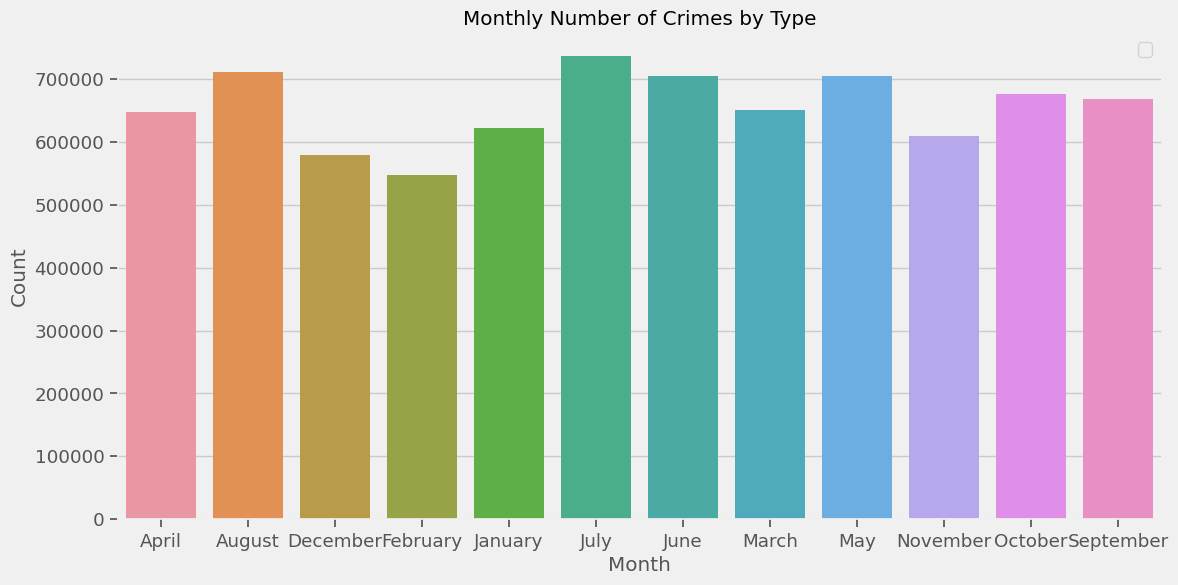

In [35]:
# Plot using seaborn catplot
plt.figure(figsize=(12, 6))
sns.barplot(data=month_sum_df, x='month', y='count')

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Number of Crimes by Type')

# Customize the legend position (optional)
plt.legend(loc='upper right')

plt.show()

In [39]:
month_sum_df.sort_values(by='count')

,month,count
3,February,547629.0
2,December,579709.0
9,November,608919.0
4,January,622102.0
0,April,647647.0
7,March,650190.0
11,September,668203.0
10,October,676232.0
6,June,703839.0
8,May,704780.0


- July has the highest amount of crimes
- February has the lowest amount of crimes

  Appears the summer months have more crimes and winter has less crimes.

## Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [ ]:
positive_crime_trend = []

for crime in crime_list:
    min_indx, max_indx = val_counts_by_year.loc[crime].agg(['idxmin', 'idxmax'])
    min_val, max_val = val_counts_by_year.loc[crime].agg(['min', 'max'])
    
    if max_indx > min_indx:
        print(crime)
        print('Min', 'Max')
        print(min_indx, max_indx)
        print(min_val, max_val)
        print('')
        
        positive_crime_trend.append(crime)